# Lenguaje Python 3 Módulo 11
Se introduce en el módulo 11 a los conceptos de exploración de información, como parte del análisis exploratorio en minería y ciencia de datos.
## Datos
A pesar de estar trabajando con información en los diferentes módulos del curso es importante para un análisis exploratorio y en caso de continuarse con análisis predictivos establecer criterios formales sobre los datos.
## Una variable
Es una propiedad o característica de un fenómeno o un individuo: temperatura, estado civil, monto de ahorro, etc. El valor contenido en la variable es el dato. La secuencia de datos de estas variables corresponde a las observaciones y se pueden asociar a momentos (tiempo) o estados.
Una colección de variables describe en forma “suficiente” a un fenómeno o individuo: registro de DB, punto de medición, objeto, entidad, observación.
### Variables cuantitativas
Es una variable que contiene números y pueden ser tratados de forma estadística y mediante análisis numéricos, por ejemplo, series de tiempo de: niveles de embalses, temperaturas a lo largo del año, distancia, derivadas e integrales, etc.
Son variables numéricas y se representan con números enteros o en punto flotante, incluyendo números complejos.
Variables discretas
Son las variables numéricas que tiene valores puntuales y normalmente se representan con valores enteros.
Variables continuas.
Son las variables numéricas que tiene cualquier valor y normalmente se representan con valores en punto flotante (no existen reales en las computadoras), cuando la observación de tipo continúa se asocia a una “estampa de tiempo” (timestamp) se considera una variable histórica o series de tiempo y para ellas existen métodos de predicción por regresión.
### Variable cualitativa
Es la variable que tiene como valor una descripción (enumerado) que categoriza la variable: Sexo femenino, masculino, el estado civil, un catálogo de carreras universitarias. Pueden ser valores numéricos que representan los estados de la variable, pero no tiene sentido operaciones como: suma, resta, media. Se pueden cuantificar mediante su cuenta por tipo de estado y así sobre los valores obtenidos establecer inferencias estadísticas: porcentaje de casados y solteros por ejemplo a partir de contar cada categoría.
Se denominan variables categóricas y para efectos de ciencia y minería de datos deben ser explícitamente diferenciados de variables numéricas.
Las variables cualitativas son de tipo nominales y/o ordinales.
#### Variables Nominales
Permiten contar su valor, comparar entre categorías, no se pueden hacer operaciones numéricas y hay que ajustarlas para poder hacer cálculos, ejemplo: número de teléfono, número cédula o pasaporte, código postal, etc.
#### Variables Ordinales
No son números (en primera instancia) ya que corresponden a categorías: nombre de región donde vive, sexo, estado civil, nombre del partido político de simpatía,
También corresponden a estados que no tienen orden, no tienen distancia o intervalo entre sus valores, se pueden contar para realizar operaciones, ejemplo: Grado académico (bachiller, master, doctor)
Estas variables es necesario categorizarlas (establecer un código para cada estado) y para ello:
1.	Se ordenan bajo algún criterio,
2.	Se establecen valores de categoría (0 es hombre, 1 es mujer, San José=0, Alajuela=1),
3.	Se establecen los límites e intervalos de cada categoría.
4.	Se asigna una etiqueta a cada categoría.
5.	En cada posición de la variable original se cambia el valor según la etiqueta.
# Manipulación de datos.
Para el análisis de información, sea exploratorio (análisis sobre los datos) o predictivo (metodología para predecir datos futuros a partir de los actuales), es importante realizar un análisis preliminar acompañado de ser necesario de transformaciones de datos: re-escalamientos (“scaling”), categorización de variables, normalización, descomposición de datos (obtener el mes del año de una variable timestamp), etc.
Con esta fase cubierta se procede a realizar análisis más profundos sobre los datos: estadísticas, clasificaciones, descomposiciones en tiempo o frecuencia, transformaciones lineales, etc.


## Estudio de un data_frame
Para hacer el análisis una revisión de la metodología, se utilizará una muestra retrospectiva de hombres en una región de alto riesgo de enfermedad cardíaca en Western Cape, Sudáfrica. Hay aproximadamente dos controles por caso de enfermedad coronaria. Muchos de los hombres con enfermedad coronaria positiva se han sometido a un tratamiento de reducción de la presión arterial y otros programas para reducir sus factores de riesgo después de su evento de enfermedad coronaria. En algunos casos, las mediciones se realizaron después de estos tratamientos. Estos datos se toman de un conjunto de datos más grande, descrito en Rousseauw et al, 1983, South African Medical Journal.

Los detalles de la información son los siguientes:

sbp: presión arterial sistólica

tabaco: tabaco acumulativo (kg)

ldl: colesterol unido a lipoproteínas de baja densidad

adiposity: adiposidad

famhist: antecedentes familiares de enfermedad cardíaca (presente, ausente)

typea: comportamiento tipo A

obesidad: nivel de obesidad.

alcohol: consumo actual de alcohol

edad: edad de inicio

chd: tienen enfermedad coronaria (Si/No)

Se observa que chd y famhsit son definitivamente variables categóticas, las otras son numéricas.

### Cargando archivo de referencia.


In [100]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Análisis Exploratorios Básico
# =============================

# Paso 1: Cargar la tabla de Datos
# Paquetes
import os
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

datos = pd.read_csv('../Datos/SAheart.csv',delimiter=';',decimal=".")
datos.head()
print(datos.shape)
print(datos.columns)

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Si
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Si
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46  No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Si
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Si

(462, 10)
Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')


In [101]:

# Paso 2: presentación de estadísticas básicas
datos.dropna().describe()
datos.mean(numeric_only=True)
datos.median(numeric_only=True)
datos.std(numeric_only=True)
datos.max(numeric_only=True)
# Los percentiles
datos.quantile(np.array([0,.25,.50,.75,1]))


sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age  
count  462.000000  462.000000  
mean    17.044394   42.816017  
std     24.481059   14.608956  
min      0.000000   15.000000  
25%      0.510000   31.000000  
50%      7.510000   45.000000  
75%     23.892500   55.000000  
max    147.190000   64.000000

sbp          138.326840
tobacco        3.635649
ldl            4.740325
adiposity     25.406732
typea         53.103896
obesity       26.044113
alcohol       17.044394
age           42.816017
dtype: float64

sbp          134.000
tobacco        2.000
ldl            4.340
adiposity     26.115
typea         53.000
obesity       25.805
alcohol        7.510
age           45.000
dtype: float64

sbp          20.496317
tobacco       4.593024
ldl           2.070909
adiposity     7.780699
typea         9.817534
obesity       4.213680
alcohol      24.481059
age          14.608956
dtype: float64

sbp          218.00
tobacco       31.20
ldl           15.33
adiposity     42.49
typea         78.00
obesity       46.58
alcohol      147.19
age           64.00
dtype: float64

C:\Users\richa\AppData\Local\Temp\ipykernel_10536\2755978540.py:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.quantile(np.array([0,.25,.50,.75,1]))


sbp  tobacco      ldl  adiposity  typea  obesity   alcohol   age
0.00  101.0   0.0000   0.9800     6.7400   13.0  14.7000    0.0000  15.0
0.25  124.0   0.0525   3.2825    19.7750   47.0  22.9850    0.5100  31.0
0.50  134.0   2.0000   4.3400    26.1150   53.0  25.8050    7.5100  45.0
0.75  148.0   5.5000   5.7900    31.2275   60.0  28.4975   23.8925  55.0
1.00  218.0  31.2000  15.3300    42.4900   78.0  46.5800  147.1900  64.0

In [102]:
# Tabla cruzada

# En las variables no numéricas
# Contando
g_chd = pd.crosstab(index=datos["chd"],columns="count")
g_chd
g_famhist = pd.crosstab(index=datos["famhist"],columns="count")
g_famhist
# Otra forma
datos['chd'].value_counts()
datos["famhist"].value_counts()

famhist_chd = pd.crosstab(index=datos["famhist"], columns=datos["chd"])
famhist_chd



col_0  count
chd         
No       302
Si       160

col_0    count
famhist       
Absent     270
Present    192

No    302
Si    160
Name: chd, dtype: int64

Absent     270
Present    192
Name: famhist, dtype: int64

chd       No  Si
famhist         
Absent   206  64
Present   96  96

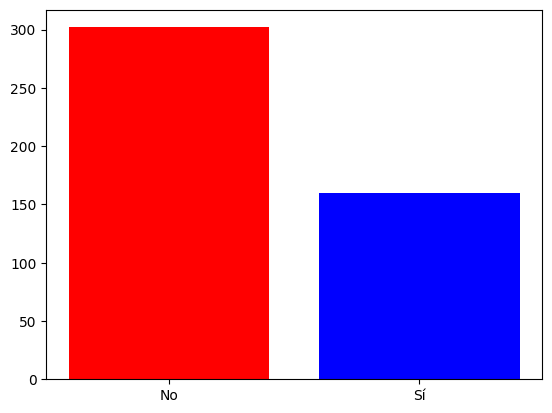

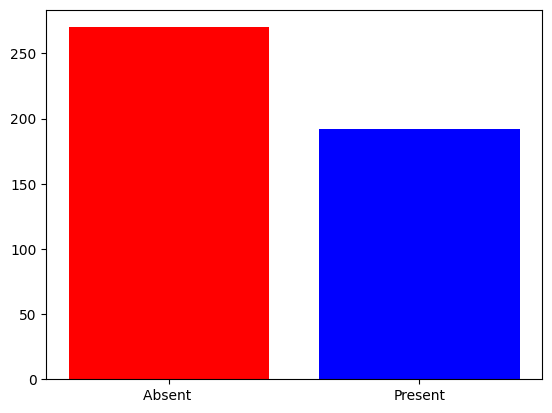

In [103]:
# Paso 3: Gráficos importantes
# Graficando

# Gráfico chd
alto = [g_chd['count'][0], g_chd['count'][1]]
barras = ('No', 'Sí')
y_pos = np.arange(len(barras))
null=plt.bar(y_pos, alto, color=['red','blue'])
null=plt.xticks(y_pos, barras)
plt.show()

# Gráfico famhist
alto = [g_famhist['count'][0], g_famhist['count'][1]]
barras = ('Absent ', 'Present')
y_pos = np.arange(len(barras))
null=plt.bar(y_pos, alto, color=['red','blue'])
null=plt.xticks(y_pos, barras)
plt.show()
plt.close()


   sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Si
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Si
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46  No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Si
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Si


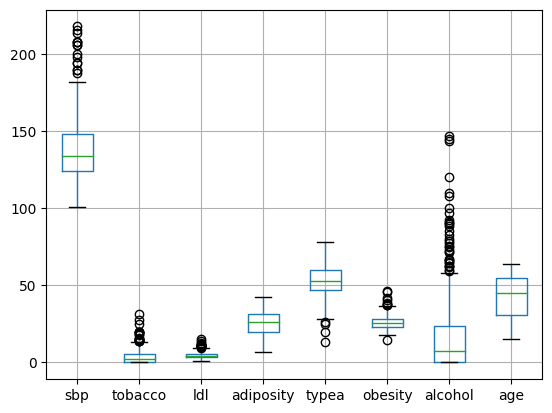

In [104]:

# Box Plots
print(datos.head())
boxplots = datos.boxplot(return_type='axes')
plt.show()
plt.close()


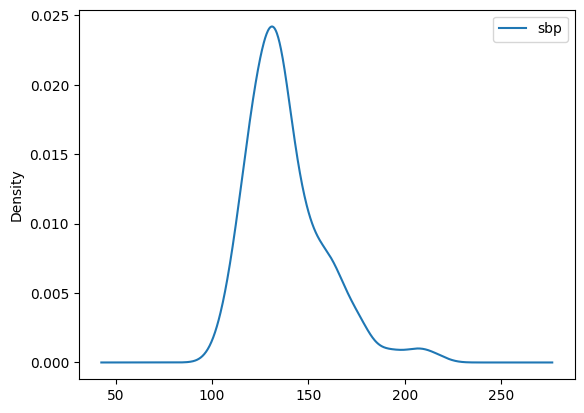

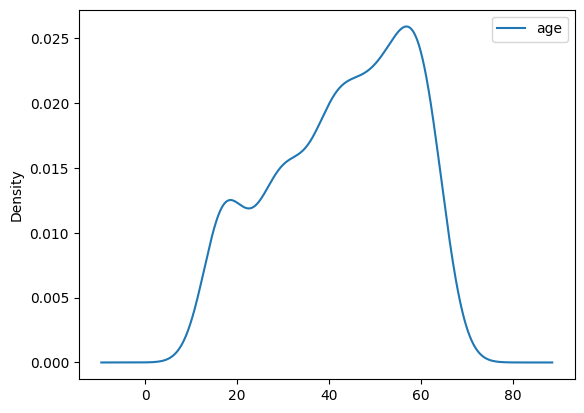

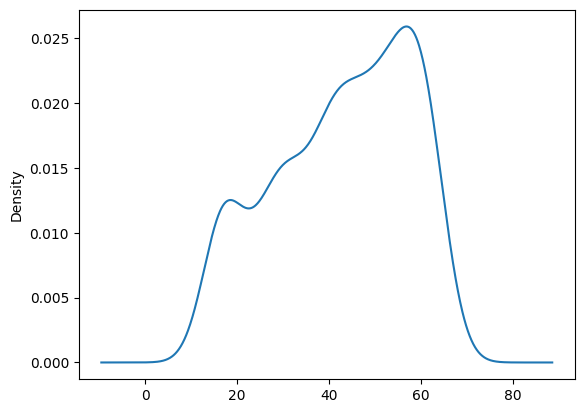

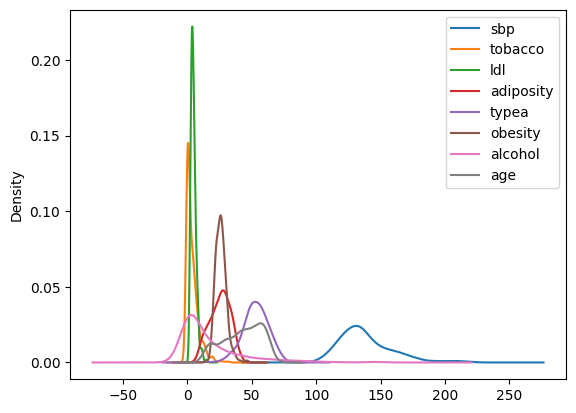

In [11]:


# Función de densidad
densidad = datos[datos.columns[:1]].plot(kind='density')
plt.show()
plt.close()


densidad = datos[datos.columns[8:9]].plot(kind='density')
plt.show()
plt.close()

densidad = datos['age'].plot(kind='density')
plt.show()
plt.close()

densidad = datos[datos.columns[:10]].plot(kind='density')
plt.show()
plt.close()


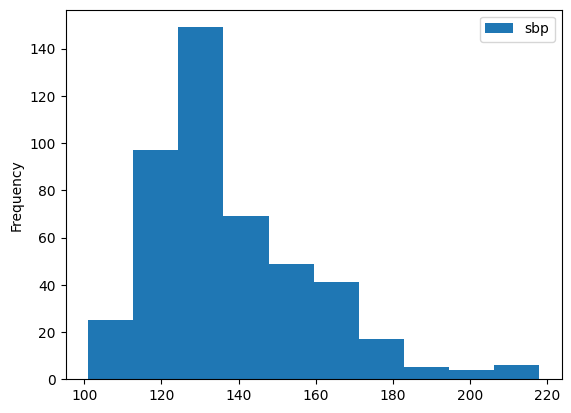

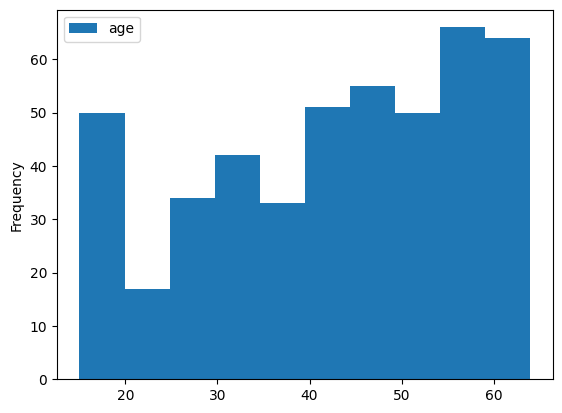

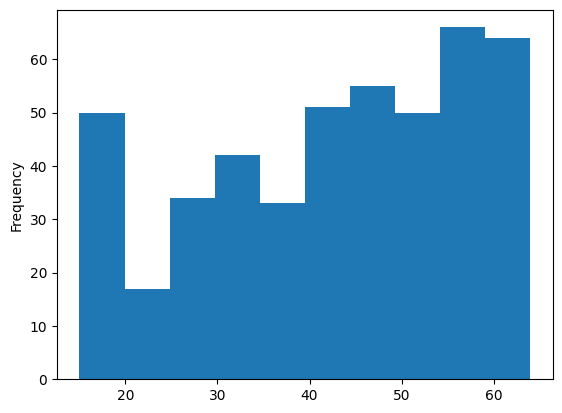

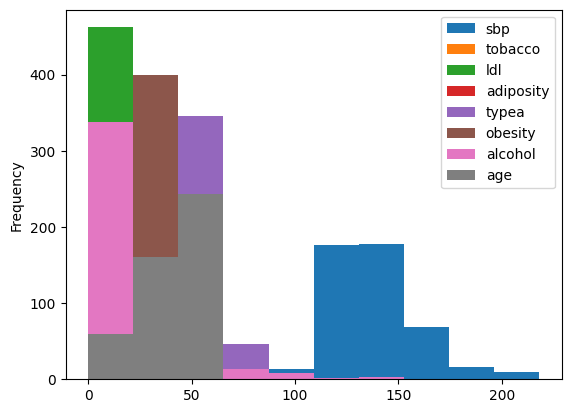

In [12]:
densidad = datos[datos.columns[:1]].plot(kind='hist')
plt.show()
plt.close()

densidad = datos[datos.columns[8:9]].plot(kind='hist')
plt.show()
plt.close()

densidad = datos['age'].plot(kind='hist')
plt.show()
plt.close()

densidad = datos[datos.columns[:10]].plot(kind='hist')
plt.show()
plt.close()


### Prueba Shapiro-Wilk

Es una prueba de normalidad, determina si la muestra dada proviene de la distribución normal o no. La hipótesis nula de la prueba de Shapiro es que la población se distribuye normalmente.

Esta es una prueba de hipótesis y las dos hipótesis son las siguientes:

**Hipotesis Nula H0(Aceptada)**: La muestra es de las distribuciones normales.(P-nula > 0.05)

**Hipotesis Alternativa Ha(Rechazado)**: La muestra no pertenece a las distribuciones normales (P-nula < 0.05).

#### Ejemplo 1: Datos Normalmente distribuidos

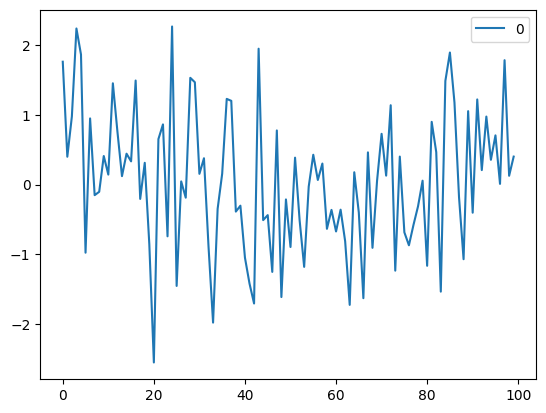

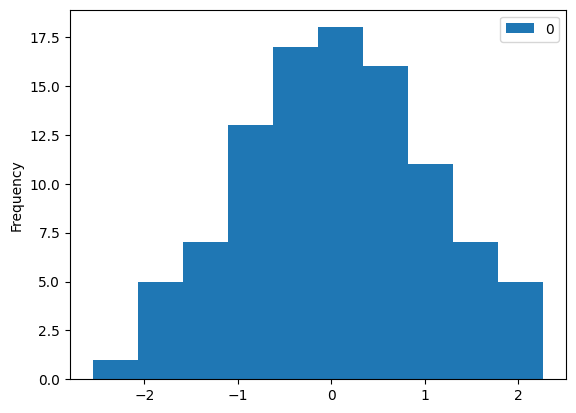

In [106]:
from numpy.random import seed
from numpy.random import randn

#inicializer seed (hace que este ejemplo sea reproducible)
seed(0)

#generate dataset of 1000 random values that follow a standard normal distribution
data = randn(100)

df = pd.DataFrame(data)
densidad = df.plot()
densidad = df.plot(kind='hist')
plt.show()
plt.close()


In [107]:
from scipy.stats import shapiro

#perform Shapiro-Wilk test
shapiro(data)

ShapiroResult(statistic=0.9926937818527222, pvalue=0.8689165711402893)

Dado que el valor **pvalue no es menor que .05, no podemos rechazar la hipótesis nula**. No tenemos suficiente evidencia para decir que los datos de la muestra no provienen de una distribución normal.

Ejemplo 2: Shapiro-Wilk en datos distribuidos de manera **no** normal 

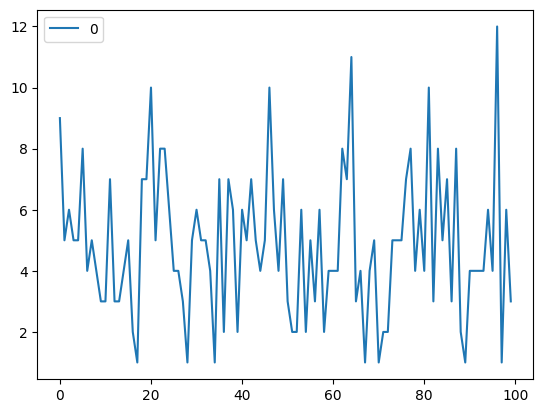

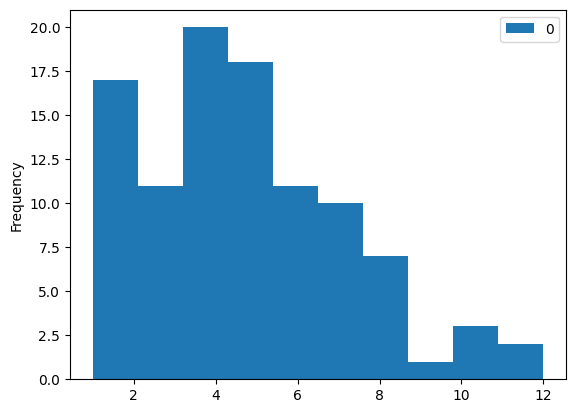

ShapiroResult(statistic=0.95819091796875, pvalue=0.0029942321125417948)

In [24]:
from numpy.random import poisson

seed(0)

#genera dataset de 100 valores que siguen una distribucion Poisson con media=5
data = poisson(5, 100)

df = pd.DataFrame(data)
densidad = df.plot()
densidad = df.plot(kind='hist')
plt.show()
plt.close()

#prueba Shapiro-Wilk
shapiro(data)

De la salida se puede ver que p-value es 0.00299.
Como el valor **p-value es menor que .05, se rechaza la hipotesis nula**. Se tiene suficiente evidencia para decir que los datos no vienen de una distribuicion normal.

# Otro Ejemplo: Iris data set

Definición Sepalo de una flor cualquiera (Sepal de una flor)

![ejemplo flor](Petalo-sepalo.jpg)


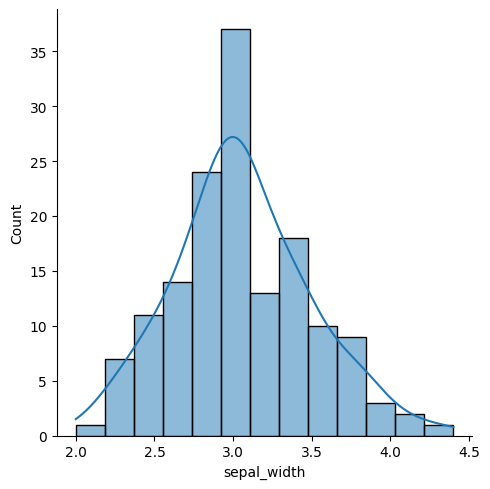

In [41]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.displot(iris["sepal_width"], kde=True)

In [108]:
scipy.stats.shapiro(iris["sepal_width"])

ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)

Con pvalue= 0.101 se puede asumir que H0 es incorrecta (H0 no se puede rechazar) y que los datos estan distribuidos normalmente

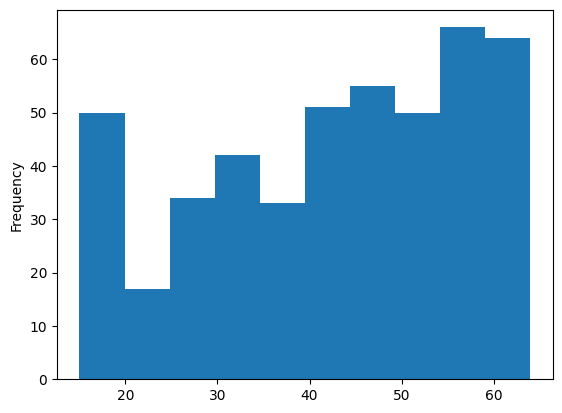

ShapiroResult(statistic=0.9370461702346802, pvalue=4.594051376295705e-13)


In [109]:
# Test de Shapiro-Wilk
# recordamos
densidad = datos['age'].plot(kind='hist')
plt.show()
plt.close()

shapiro_resultados = scipy.stats.shapiro(datos['age'])
print(shapiro_resultados)


Como el valor **p-value es menor que .05, se rechaza la hipotesis nula**. Se tiene suficiente evidencia para decir que los datos no vienen de una distribuicion normal

In [112]:
from pandas.api.types import is_numeric_dtype


for col in datos.columns:
    if is_numeric_dtype(datos[col]):
        print(col, shapiro(datos[col]))




sbp ShapiroResult(statistic=0.9230959415435791, pvalue=1.252958918259231e-14)
tobacco ShapiroResult(statistic=0.7737237811088562, pvalue=9.268022077917026e-25)
ldl ShapiroResult(statistic=0.9207449555397034, pvalue=7.146635510484924e-15)
adiposity ShapiroResult(statistic=0.9835307002067566, pvalue=4.2413408664288e-05)
typea ShapiroResult(statistic=0.9913694858551025, pvalue=0.008596815168857574)
obesity ShapiroResult(statistic=0.9607436060905457, pvalue=9.22480813958515e-10)
alcohol ShapiroResult(statistic=0.7143470048904419, pvalue=2.526738620199406e-27)
age ShapiroResult(statistic=0.9370461702346802, pvalue=4.594051376295705e-13)


In [65]:
shapiro(datos[datos.columns[0]])

ShapiroResult(statistic=0.9230959415435791, pvalue=1.252958918259231e-14)

<AxesSubplot: xlabel='age', ylabel='ldl'>

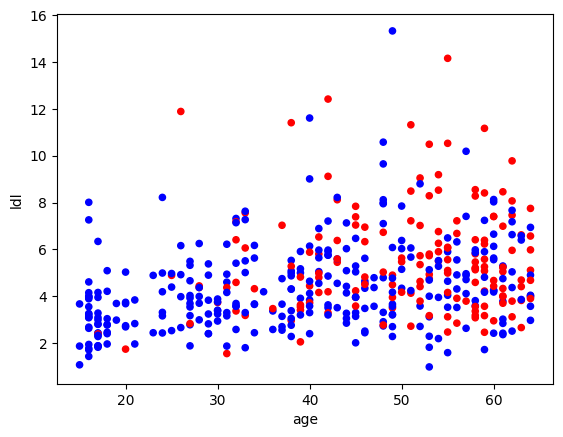

Text(0.5, 0, 'age')

Text(0, 0.5, 'ldl')

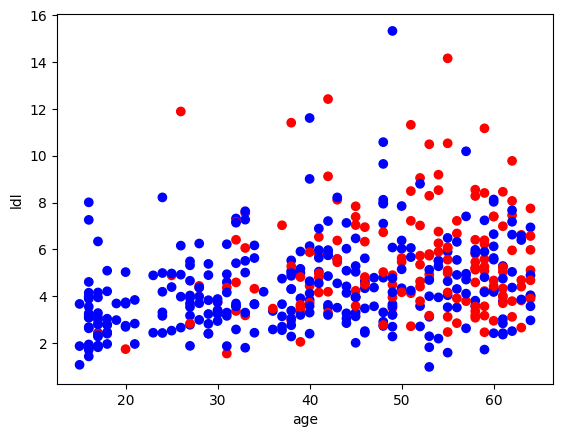

In [113]:

# Scatter Plot entre dos variables
colores = []
for i in datos['chd']:
    if i=='Si':
        colores.append('red')
    else:
        colores.append('blue')

# Orientado a objetos
datos.plot(kind='scatter', x='age', y='ldl', c=colores)
plt.show()
plt.close()

# Estilo funcional
plt.scatter(datos['age'], datos['ldl'],c=colores)
plt.xlabel('age')
plt.ylabel('ldl')
plt.show()
plt.close()


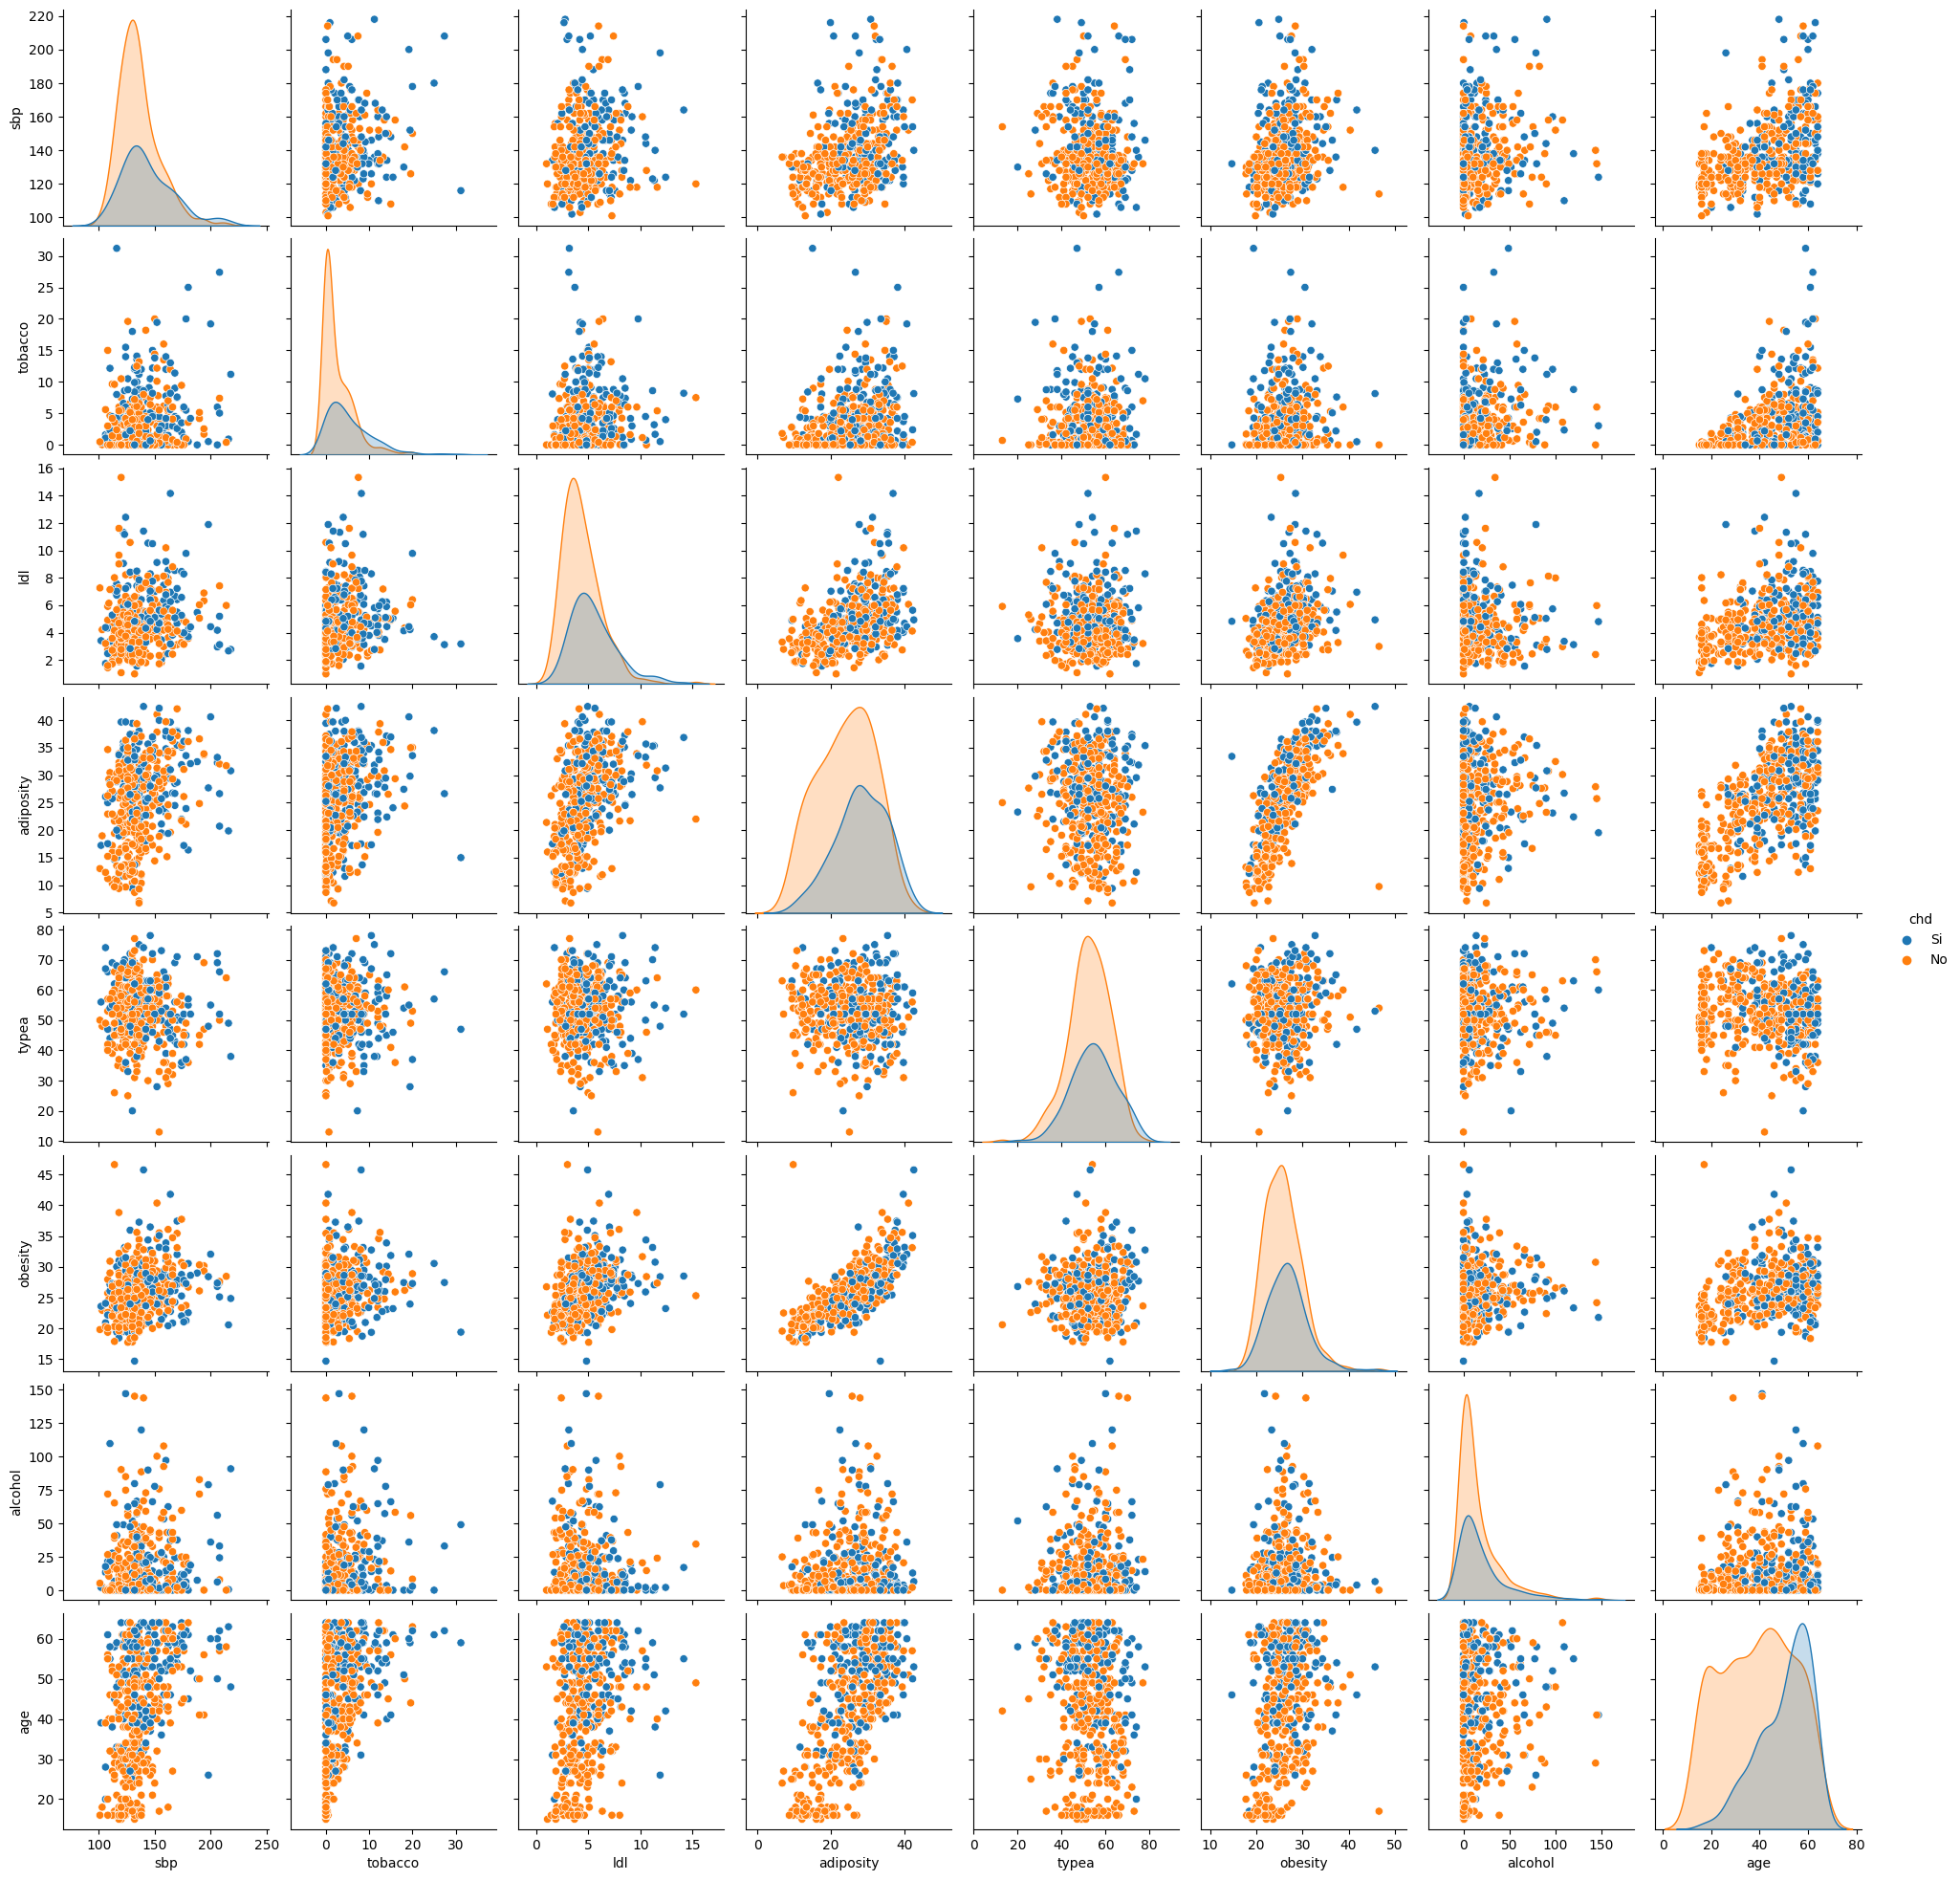

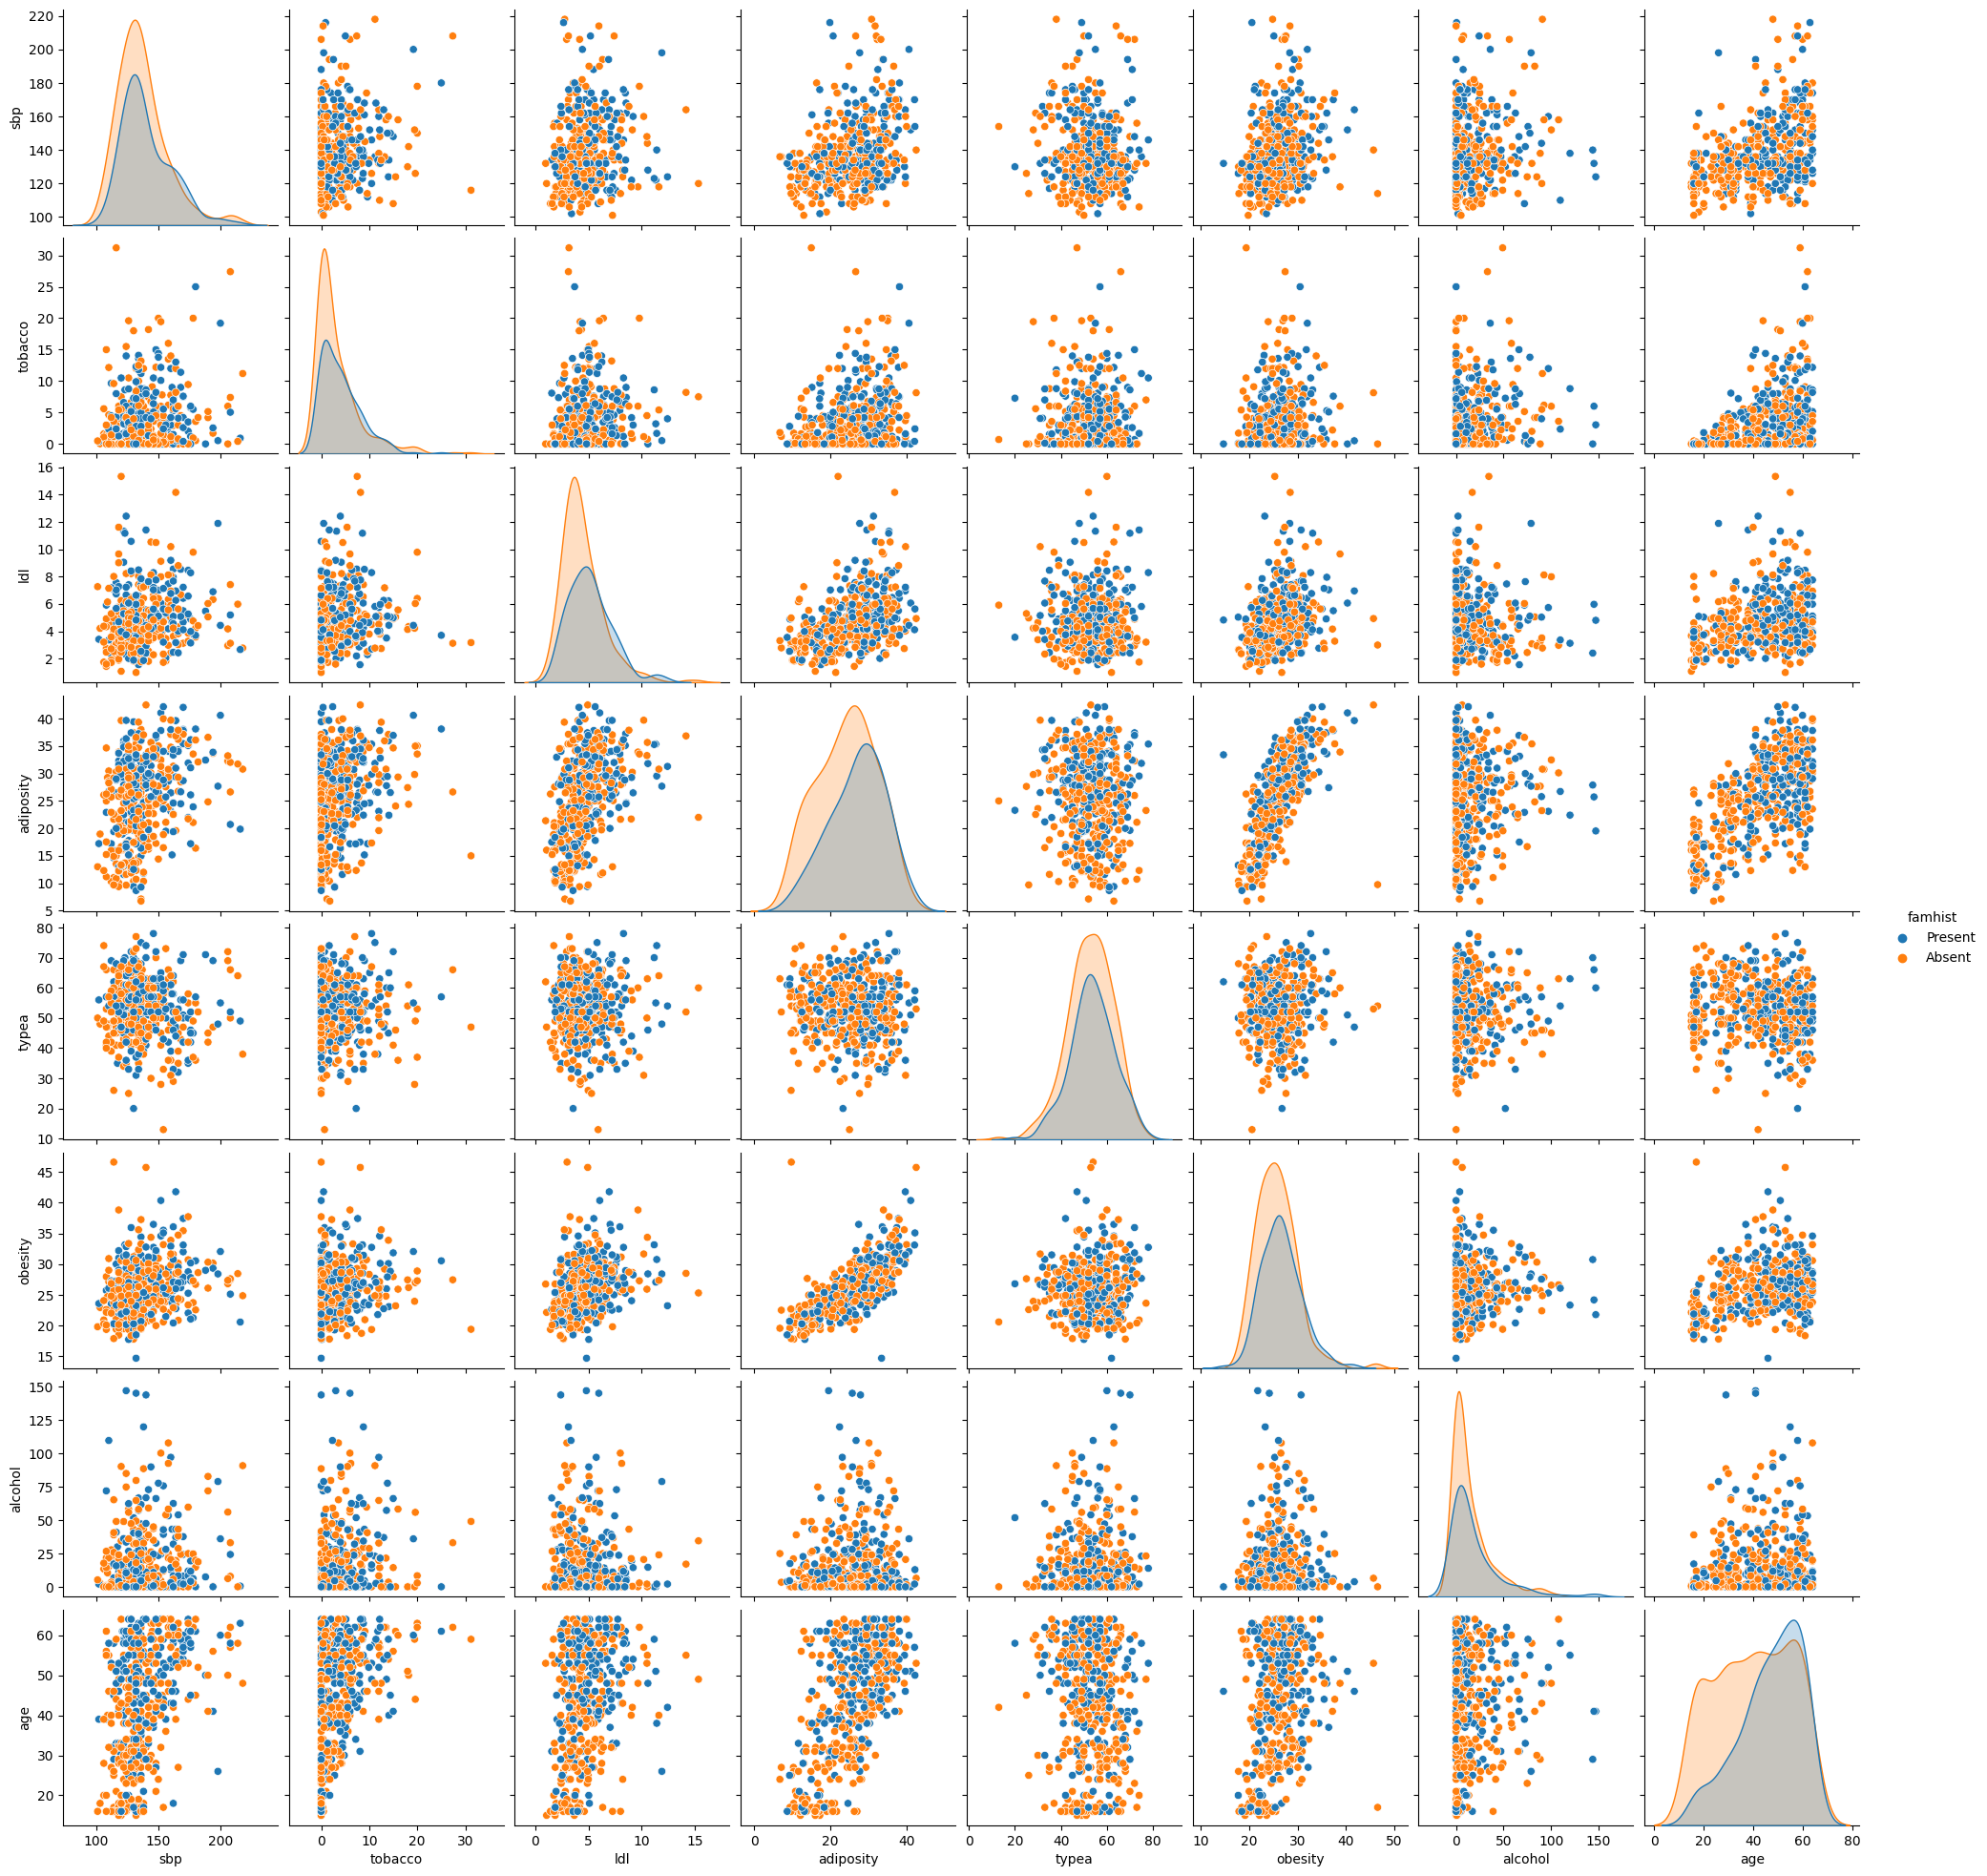

In [72]:
# Gráfico de todas las variables 2 a 2
# El paquete Seaborn
import seaborn as sns

null=sns.pairplot(datos, hue='chd', height=2.5)
plt.show()
plt.close()

null=sns.pairplot(datos, hue='famhist', height=2.5)
plt.show()
plt.close()

## @knitr Item_A5B

C:\Users\richa\AppData\Local\Temp\ipykernel_10536\1276489914.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = datos.corr()


sbp   tobacco       ldl  adiposity     typea   obesity  \
sbp        1.000000  0.212247  0.158296   0.356500 -0.057454  0.238067   
tobacco    0.212247  1.000000  0.158905   0.286640 -0.014608  0.124529   
ldl        0.158296  0.158905  1.000000   0.440432  0.044048  0.330506   
adiposity  0.356500  0.286640  0.440432   1.000000 -0.043144  0.716556   
typea     -0.057454 -0.014608  0.044048  -0.043144  1.000000  0.074006   
obesity    0.238067  0.124529  0.330506   0.716556  0.074006  1.000000   
alcohol    0.140096  0.200813 -0.033403   0.100330  0.039498  0.051620   
age        0.388771  0.450330  0.311799   0.625954 -0.102606  0.291777   

            alcohol       age  
sbp        0.140096  0.388771  
tobacco    0.200813  0.450330  
ldl       -0.033403  0.311799  
adiposity  0.100330  0.625954  
typea      0.039498 -0.102606  
obesity    0.051620  0.291777  
alcohol    1.000000  0.101125  
age        0.101125  1.000000

C:\Users\richa\AppData\Local\Temp\ipykernel_10536\1276489914.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot: >

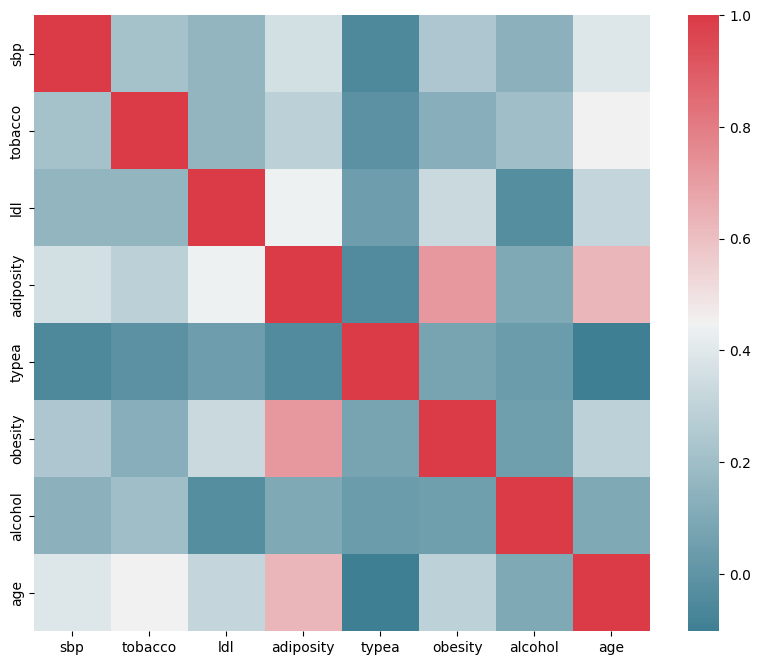

No    302
Si    160
Name: chd, dtype: int64
No    302
Si    160
Name: chd, dtype: int64


sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52    1
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63    1
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46    0
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58    1
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1

0    302
1    160
Name: chd, dtype: int64
0    302
1    160
Name: chd, dtype: int64


sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Si
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Si
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46  No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Si
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Si

In [114]:
# Es inteligente e ignora las variables categóricas

corr = datos.corr()
corr
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()
plt.close()


# Conviertiendo una categoría en números
print(pd.value_counts(datos["chd"]))
# Equivalente
print(datos['chd'].value_counts())

# La siguiento función recodifica usando pandas
def recodificar(col, nuevo_codigo):
  col_cod = pd.Series(col, copy=True)
  for llave, valor in nuevo_codigo.items():
    col_cod.replace(llave, valor, inplace=True)
  return col_cod

datos["chd"] = recodificar(datos["chd"], {'No':0,'Si':1})
datos.head()

# Luego de recoficar
print(pd.value_counts(datos["chd"]))
# Equivalente
print(datos['chd'].value_counts())

# Conviertiendo un número en una categoría
datos["chd"] = recodificar(datos["chd"], {0:'No',1:'Si'})
datos.head()

##______________________ ACP_________________
## @knitr Item_B1

# Análisis en Componentes Principales (ACP o PCA)
Para el caso de la estadística, el análisis de componentes principales (conocido en español como ACP, y en inglés como PCA) es una técnica que utiliza transformaciones lineales con el fin de poder describir un conjunto de datos con muchas variables mediante una “transformación” a un plano de dos variables nuevas. Estas variables se denominan “componentes” y deben ser idealmente no correlacionadas. Los componentes se ordenan según la “cantidad de varianza”, y por lo tanto permite reducir la dimensionalidad del data_frame (conjunto de datos) original.

Técnicamente, el ACP busca la proyección a partir de los datos originales en la cual las variables resultantes queden mejor representados en términos de mínimos cuadrados.

El ACP construye una transformación lineal que escoge un nuevo sistema de coordenadas para el conjunto original de datos en el cual la varianza de mayor tamaño del conjunto de datos es capturada en el primer eje (llamado el Primer Componente Principal), la segunda varianza más grande es el segundo eje, y así sucesivamente.

[Video de Explicación](https://www.youtube.com/watch?v=Dru4gDLFRyI&ab_channel=JoseLuisVicenteVillardon)

## Procedimiento.
Para construir esta transformación lineal debe construirse primero la matriz de covarianza o matriz de coeficientes de correlación. Esta matriz es simétrica por lo que existe una base completa de vectores propios. La transformación se hace de las coordenadas originales a la nueva base mediante la transformación lineal y por lo tanto produce una reducción en la dimensión original de datos.

El ACP se emplea en el análisis exploratorio de datos, como una de las técnicas de minería para identificar agrupaciones de variables, a partir de los cuales se pueden construir modelos predictivos. En ACP se hace el cálculo y la descomposición en autovalores de la matriz de covarianza, y normalmente se hace tras centrar los datos en la media de cada atributo.
Debe diferenciarse del análisis factorial con el que tiene similitudes formales y en el cual puede ser utilizado como un método de aproximación para la extracción de factores.

## Análisis de PCA en Python

En Python el análisis de componentes principales se realiza utilizando el paquete PCA dentro de la biblioteca sklearn y decomposition.
En los siguientes ejemplos se ve la aplicación de esta técnica.

### Ejemplo 1

array([[ 0.96069503,  0.5909006 ],
       [-0.59854339, -0.40259339],
       [-2.22805938, -0.53257674],
       [-0.46143006, -0.49886724],
       [-0.95892903, -0.26933102],
       [-0.67307991, -0.33830855],
       [ 1.30501861,  0.59135785],
       [ 0.3745456 , -0.0985442 ],
       [-1.82628627, -0.40617025],
       [ 0.66826228,  0.3368774 ],
       [-0.58264668, -0.17736922],
       [-0.41812898, -0.37381139],
       [ 0.17220937,  0.26466884],
       [ 0.37711669,  0.18844297],
       [-0.67939623, -0.13160198],
       [ 1.0314896 ,  0.42555002],
       [ 0.3360418 ,  0.03909827],
       [ 0.70574599,  0.48873065],
       [ 0.83951155,  0.15212587]])

(200, 2)


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

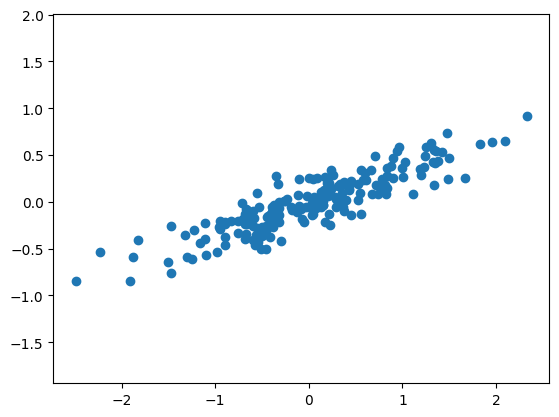

In [98]:
# ANÁLISIS EN COMPONENTES PRINCIPALES - ACP
# =========================================

from sklearn.decomposition import PCA

# Ejemplo 1
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X[1:20]
print(X.shape)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal') # Misma Escala
plt.show()
plt.close()



PCA(n_components=2)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

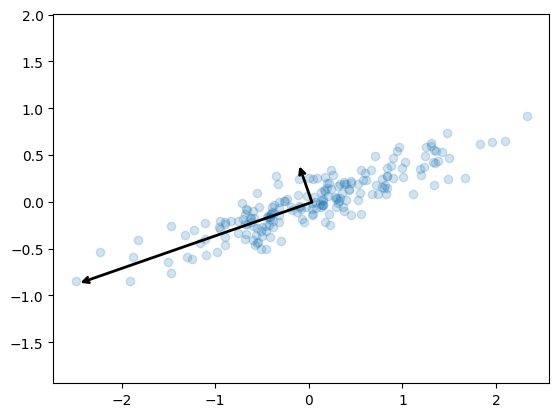

In [99]:

pca = PCA(n_components=2) # Establece que va a calcular solo 2 componentes
pca.fit(X) # Ejecuta el ACP
print(pca.components_)
print(pca.explained_variance_)

def dibuja_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    tipo_flecha=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=tipo_flecha)


# Plotea los datos y las 2 componentes
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    dibuja_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()
plt.close()


### Ejemplo 2: Digitos

[https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

(1797, 64)

(1797, 64)
(1797, 2)


Text(0.5, 0, 'componente 1')

Text(0, 0.5, 'componente 2')

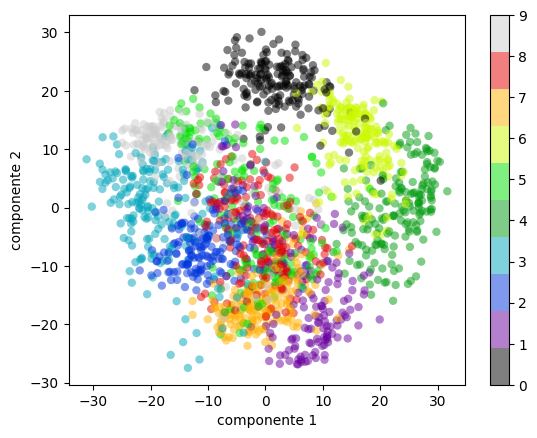

In [90]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

pca = PCA(2)  # Reduce las dimensiones a 2
componentes = pca.fit_transform(digits.data)
print(digits.data.shape)
print(componentes.shape)

plt.scatter(componentes[:, 0], componentes[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar()
plt.show()
plt.close()


Sepal length  Sepal width  Petal length  Petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

0         1
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835

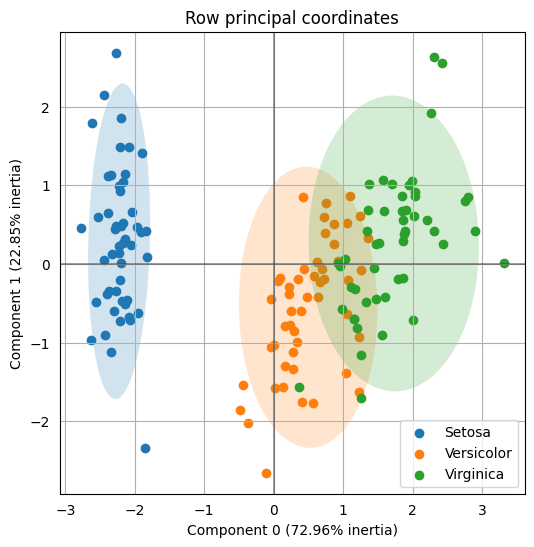

In [82]:
# Ejemplo 4 (con prince)

from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
X.head()

pca = prince.PCA(n_components=2,n_iter=3,rescale_with_mean=True,rescale_with_std=True,copy=True,check_input=True,engine='auto',random_state=42)
pca = pca.fit(X)
pca.transform(X).head()
ax = pca.plot_row_coordinates(X,ax=None,figsize=(6, 6),x_component=0,y_component=1,labels=None,color_labels=y,ellipse_outline=False,ellipse_fill=True,show_points=True)
plt.show()
plt.close()
